In [1]:
import keras
from keras.layers import Dense, BatchNormalization
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/home/nlp/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/nlp/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/nlp/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


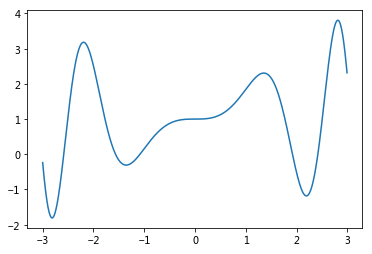

In [2]:
def target_func(x): 
    return x * np.sin(x**2) + 1
    # return np.sin(5 * np.pi * x) / (5 * np.pi * x)

# datapoints = [(x, target_func(x)) for x in np.linspace(0.001, 1, 1000)]
datapoints = [(x, target_func(x)) for x in np.arange(-3, 3, 0.005)]
datapoints = list(zip(*datapoints))

X_train, X_dev, y_train, y_dev = train_test_split(datapoints[0], datapoints[1], test_size=0.1)

# normalization
# data_mean = np.mean(datapoints[0])
# data_std = np.std(datapoints[0])
# X_train = (X_train - data_mean) / data_std
# X_dev = (X_dev - data_mean) / data_std

train_data = (X_train, np.array(y_train))
validation_data = (X_dev, np.array(y_dev))

plt.plot(datapoints[0], np.array(datapoints[1]))

In [3]:
class BaseModel:
    
    def __init__(self):
        self.model = self.build()
        self.history = keras.callbacks.History()
    
    def build(self):
        raise NotImplementedError("Each Model must re-implement this method.")
    
    def fit(self, train_data, validation_data):
        self.history = self.model.fit(train_data[0], train_data[1],
                                      validation_data=validation_data, 
                                      epochs=10000, 
                                      batch_size=64,
                                      callbacks=[self.history], 
                                      verbose=0)
        self.score = self.model.evaluate(validation_data[0], validation_data[1])
        # print("score:", score)


class ShallowModel(BaseModel):
    
    def build(self):
        model = keras.Sequential()
        model.add(Dense(45, activation="relu", input_shape=(1,)))
        model.add(Dense(1))
        adam = keras.optimizers.Adam()
        model.compile(optimizer=adam, loss="mean_squared_error")
        # model.summary()
        return model

    
class MiddleModel(BaseModel):
    
    def build(self):
        model = keras.Sequential()
        model.add(Dense(12, activation="relu", input_shape=(1,)))
        model.add(Dense(8, activation="relu"))
        model.add(Dense(1))
        adam = keras.optimizers.Adam()
        model.compile(optimizer=adam, loss="mean_squared_error")
        # model.summary()
        return model


class DeepModel(BaseModel):

    def build(self):
        model = keras.Sequential()
        model.add(Dense(5, activation="relu", input_shape=(1,)))
        # model.add(BatchNormalization())
        model.add(Dense(5, activation="relu"))
        # model.add(BatchNormalization())
        model.add(Dense(5, activation="relu"))
        # model.add(BatchNormalization())
        model.add(Dense(5, activation="relu"))
        # model.add(BatchNormalization())
        model.add(Dense(5, activation="relu"))
        # model.add(BatchNormalization())
        # model.add(Dense(5, activation="relu"))
        model.add(Dense(1))
        adam = keras.optimizers.Adam()
        model.compile(optimizer=adam, loss="mean_squared_error")
        # model.summary()
        return model

def eval_model(t_model):
    t_model.fit(train_data, validation_data)

    print("\n ====== count_params: %s, test error: %s ======" % (t_model.model.count_params(), t_model.score))
    
    plt.plot(datapoints[0], datapoints[1])
    plt.plot(datapoints[0], t_model.model.predict(np.array(datapoints[0])))
    plt.show()

    epoch = t_model.history.epoch
    train_loss = t_model.history.history.get("loss")
    val_loss = t_model.history.history.get("val_loss")
    plt.plot(epoch, train_loss, label="train loss")
    plt.plot(epoch, val_loss, label = "val loss")
    plt.show()

120/120 [==============================] - 0s 22us/step

 ====== count_params: 136, test error: 0.10650438268979391 ======


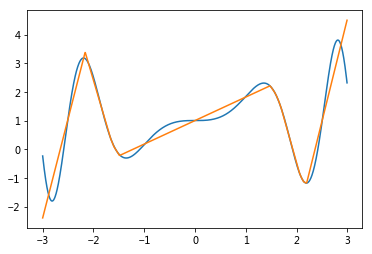

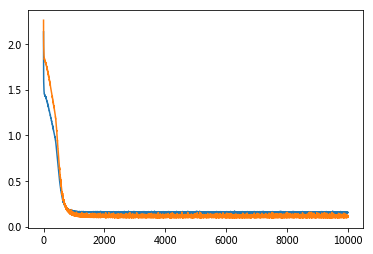

In [4]:
shallow_model = ShallowModel()
eval_model(shallow_model)

120/120 [==============================] - 0s 22us/step

 ====== count_params: 137, test error: 0.05270374218622843 ======


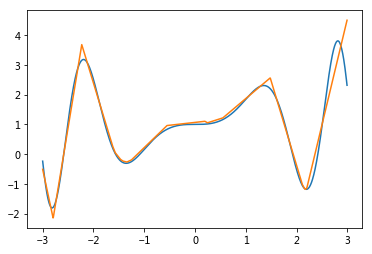

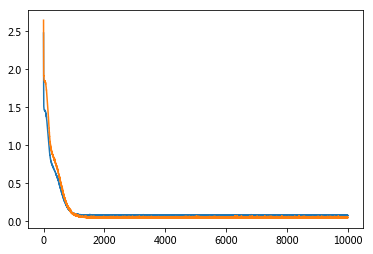

In [5]:
middle_model = MiddleModel()
eval_model(middle_model)

120/120 [==============================] - 0s 24us/step

 ====== count_params: 136, test error: 0.008816224352146188 ======


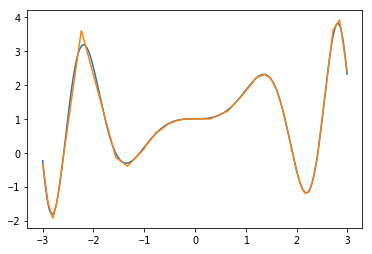

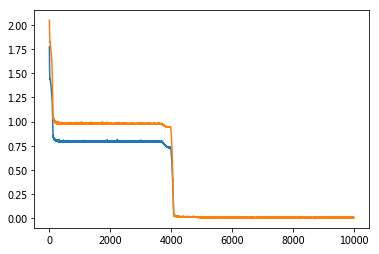

In [6]:
deep_model = DeepModel()
eval_model(deep_model)

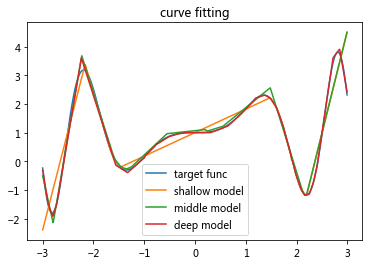

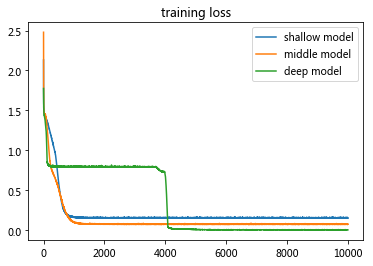

'\nplt.plot(epoch, shallow_model.history.history.get("val_loss"), label="shallow model")\nplt.plot(epoch, middle_model.history.history.get("val_loss"), label="middle model")\nplt.plot(epoch, deep_model.history.history.get("val_loss"), label="deep model")\nplt.legend()\nplt.title("validation loss")\nplt.show()\n'

In [10]:
plt.plot(datapoints[0], datapoints[1], label="target func")
plt.plot(datapoints[0], shallow_model.model.predict(np.array(datapoints[0])), label="shallow model")
plt.plot(datapoints[0], middle_model.model.predict(np.array(datapoints[0])), label="middle model")
plt.plot(datapoints[0], deep_model.model.predict(np.array(datapoints[0])), label="deep model")
plt.legend()
plt.title("curve fitting")
plt.show()

epoch = shallow_model.history.epoch
plt.plot(epoch, shallow_model.history.history.get("loss"), label="shallow model")
plt.plot(epoch, middle_model.history.history.get("loss"), label="middle model")
plt.plot(epoch, deep_model.history.history.get("loss"), label="deep model")
plt.legend()
plt.title("training loss")
plt.show()

'''
plt.plot(epoch, shallow_model.history.history.get("val_loss"), label="shallow model")
plt.plot(epoch, middle_model.history.history.get("val_loss"), label="middle model")
plt.plot(epoch, deep_model.history.history.get("val_loss"), label="deep model")
plt.legend()
plt.title("validation loss")
plt.show()
'''